In [2]:
import requests
import pandas as pd

In [3]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [4]:
btc_data = get_historic_price('btc','bitstamp','2022-09-01')
eth_data = get_historic_price('eth','bitstamp','2022-09-01')

### Bitcoin

In [6]:
btc_data.head()  # print first five rows only

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-01 00:00:00,20150,20150,19967,20059,81.519607,1.631906e+06
2022-09-01 01:00:00,20049,20131,19923,20062,41.623411,8.338117e+05
2022-09-01 02:00:00,20062,20169,20062,20132,22.497674,4.530298e+05
2022-09-01 03:00:00,20131,20202,20068,20124,70.865065,1.427482e+06
2022-09-01 04:00:00,20123,20177,19932,20014,51.973471,1.041562e+06


In [7]:
btc_data

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-01 00:00:00,20150,20150,19967,20059,81.519607,1.631906e+06
2022-09-01 01:00:00,20049,20131,19923,20062,41.623411,8.338117e+05
2022-09-01 02:00:00,20062,20169,20062,20132,22.497674,4.530298e+05
2022-09-01 03:00:00,20131,20202,20068,20124,70.865065,1.427482e+06
2022-09-01 04:00:00,20123,20177,19932,20014,51.973471,1.041562e+06
...,...,...,...,...,...,...
2022-09-11 08:00:00,21441,21625,21441,21615,50.519289,1.090261e+06
2022-09-11 09:00:00,21614,21730,21566,21680,58.112087,1.258898e+06
2022-09-11 10:00:00,21679,21698,21603,21610,68.089751,1.474310e+06


In [8]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2022-09-01 00:00:00 to 2022-09-11 12:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   253 non-null    int64  
 1   HighPrice   253 non-null    int64  
 2   LowPrice    253 non-null    int64  
 3   ClosePrice  253 non-null    int64  
 4   Volume      253 non-null    float64
 5   NA          253 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 13.8 KB


<AxesSubplot:xlabel='CloseTime'>

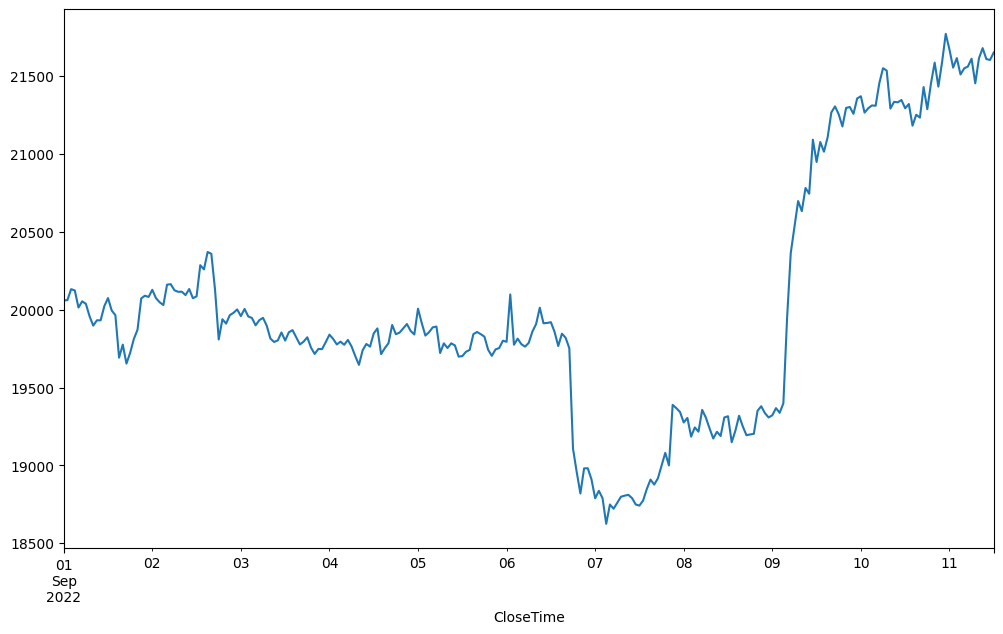

In [9]:
btc_data['ClosePrice'].plot(figsize=(12,7))

In [19]:
btc_writer = pd.ExcelWriter("btc_rates.xlsx")
btc_data.to_excel(btc_writer,sheet_name="Bitcoin")

### Ether

In [10]:
eth_data.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-01 00:00:00,1569.3,1569.3,1542.9,1554.2,699.729322,1.088255e+06
2022-09-01 01:00:00,1554.9,1566.3,1533.8,1551.8,336.395105,5.208327e+05
2022-09-01 02:00:00,1550.9,1564.0,1548.3,1559.9,122.795699,1.910677e+05
2022-09-01 03:00:00,1561.2,1573.8,1552.2,1557.6,159.916809,2.504758e+05
2022-09-01 04:00:00,1557.6,1563.1,1537.9,1550.0,376.690077,5.851391e+05


In [11]:
eth_data

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-01 00:00:00,1569.3,1569.3,1542.9,1554.2,699.729322,1.088255e+06
2022-09-01 01:00:00,1554.9,1566.3,1533.8,1551.8,336.395105,5.208327e+05
2022-09-01 02:00:00,1550.9,1564.0,1548.3,1559.9,122.795699,1.910677e+05
2022-09-01 03:00:00,1561.2,1573.8,1552.2,1557.6,159.916809,2.504758e+05
2022-09-01 04:00:00,1557.6,1563.1,1537.9,1550.0,376.690077,5.851391e+05
...,...,...,...,...,...,...
2022-09-11 08:00:00,1752.8,1762.8,1752.4,1762.0,485.065698,8.523143e+05
2022-09-11 09:00:00,1762.1,1768.1,1758.7,1765.5,151.960013,2.680124e+05
2022-09-11 10:00:00,1765.1,1765.7,1760.2,1760.4,158.823172,2.800031e+05


In [12]:
eth_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2022-09-01 00:00:00 to 2022-09-11 12:00:00
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OpenPrice   253 non-null    float64
 1   HighPrice   253 non-null    float64
 2   LowPrice    253 non-null    float64
 3   ClosePrice  253 non-null    float64
 4   Volume      253 non-null    float64
 5   NA          253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='CloseTime'>

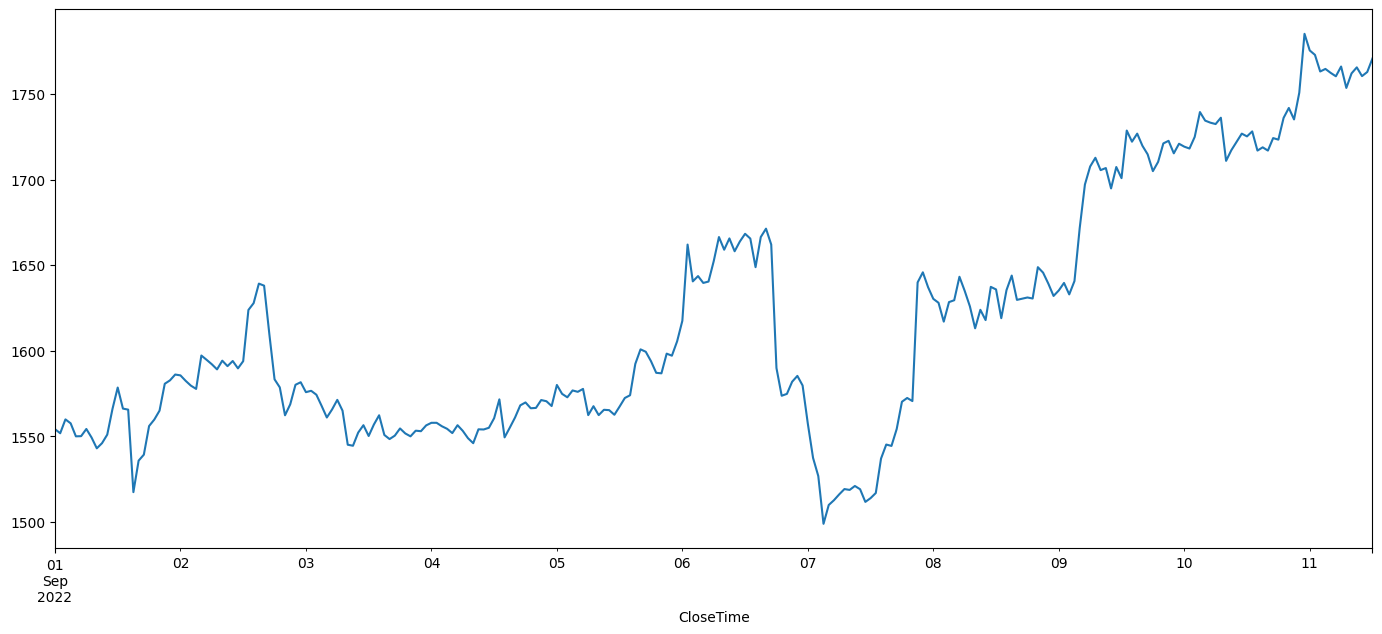

In [20]:
eth_data['ClosePrice'].plot(figsize=(17,7))

In [16]:
eth_writer = pd.ExcelWriter('eth_rates.xlsx')

In [18]:
eth_data.to_excel(eth_writer, sheet_name='Ether')